In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression

In [80]:
df = pd.read_csv(r'C:\Users\tharu\OneDrive\Desktop\Data_Scientist\Day 5 FN\insurance_data.csv')
print(df.head())
print("Dataset information:")
print(df.info())
print(df.tail())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None
    age  bought_insurance
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0


In [81]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [82]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age                 0
bought_insurance    0
dtype: int64


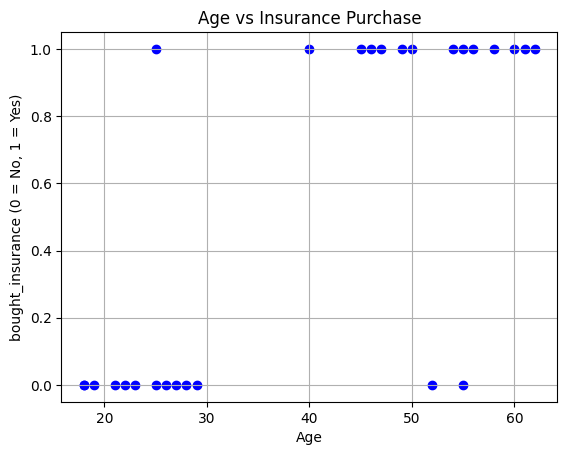

In [83]:
plt.scatter(df['age'], df['bought_insurance'],color='blue')
plt.xlabel('Age')
plt.ylabel('bought_insurance (0 = No, 1 = Yes)')
plt.title('Age vs Insurance Purchase')
plt.grid(True)
plt.show()

In [84]:
X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(6, 1)
(21,)
(6,)


In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [87]:
print(model.coef_)
print(model.intercept_)

[[0.11307708]]
[-4.15311919]


In [88]:
y_pred = model.predict(X_test)

print("Predicted:", y_pred.tolist())
print("Actual   :", y_test.tolist())

Predicted: [1, 0, 1, 0, 0, 0]
Actual   : [1, 0, 1, 0, 0, 0]


In [89]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 2]]


c:\Users\tharu\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


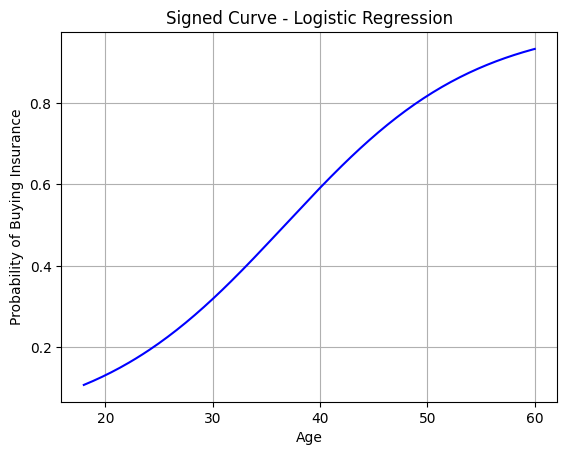

[[18.        ]
 [18.21105528]
 [18.42211055]
 [18.63316583]
 [18.84422111]
 [19.05527638]
 [19.26633166]
 [19.47738693]
 [19.68844221]
 [19.89949749]
 [20.11055276]
 [20.32160804]
 [20.53266332]
 [20.74371859]
 [20.95477387]
 [21.16582915]
 [21.37688442]
 [21.5879397 ]
 [21.79899497]
 [22.01005025]
 [22.22110553]
 [22.4321608 ]
 [22.64321608]
 [22.85427136]
 [23.06532663]
 [23.27638191]
 [23.48743719]
 [23.69849246]
 [23.90954774]
 [24.12060302]
 [24.33165829]
 [24.54271357]
 [24.75376884]
 [24.96482412]
 [25.1758794 ]
 [25.38693467]
 [25.59798995]
 [25.80904523]
 [26.0201005 ]
 [26.23115578]
 [26.44221106]
 [26.65326633]
 [26.86432161]
 [27.07537688]
 [27.28643216]
 [27.49748744]
 [27.70854271]
 [27.91959799]
 [28.13065327]
 [28.34170854]
 [28.55276382]
 [28.7638191 ]
 [28.97487437]
 [29.18592965]
 [29.39698492]
 [29.6080402 ]
 [29.81909548]
 [30.03015075]
 [30.24120603]
 [30.45226131]
 [30.66331658]
 [30.87437186]
 [31.08542714]
 [31.29648241]
 [31.50753769]
 [31.71859296]
 [31.92964

In [90]:
ages = np.linspace(18,60,200).reshape(-1,1)
probs = model.predict_proba(ages)[:, 1]
plt.plot(ages, probs, color='blue')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Signed Curve - Logistic Regression')
plt.grid(True)
plt.show()
print(ages)
print(probs)

In [91]:
print("will a 400 year-old buy insurance?")
print("Pridiction : (0 = No, 1 = Yes) : ",model.predict([[40]])) 
print("Probability of buying insurance :",model.predict_proba([[40]])[0][1])

will a 400 year-old buy insurance?
Pridiction : (0 = No, 1 = Yes) :  [1]
Probability of buying insurance : 0.5914502932840706


c:\Users\tharu\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\tharu\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [92]:
a = model.predict_proba([[40]])
print(a.shape)
print(a)

(1, 2)
[[0.40854971 0.59145029]]


c:\Users\tharu\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


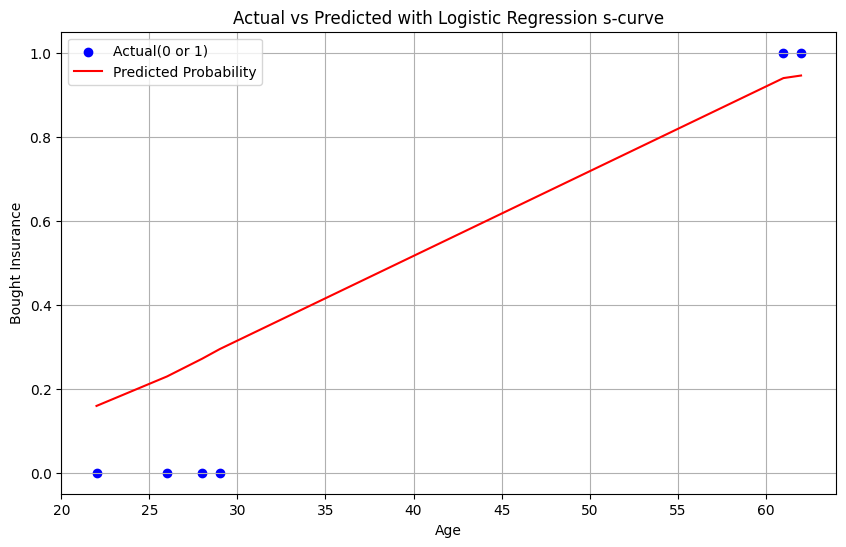

In [93]:
x_test_sorted = X_test.sort_values(by = 'age')
y_test_sorted = y_test.loc[x_test_sorted.index]
y_pred_sorted = model.predict_proba(x_test_sorted)[:,1]

plt.figure(figsize=(10,6))
plt.scatter(x_test_sorted['age'], y_test_sorted,color='blue', label='Actual(0 or 1)')
plt.plot(x_test_sorted['age'], y_pred_sorted,color='red', label='Predicted Probability')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Actual vs Predicted with Logistic Regression s-curve')
plt.legend()
plt.grid(True)
plt.show()